# Objective

To predict the average ratings of new restaurants

# Data Definition

**url:** Contains the url of the restaurant in the zomato website

**address:** Contains the address of the restaurant in Bangalore

**name:** Contains the name of the restaurant

**online_order**: Whether online ordering is available in the restaurant or not

**book_table:** Table booking option available or not

**rate:** Contains the overall rating of the restaurant out of 5

**votes:** Contains total number of rating for the restaurant as of the above mentioned date

**phone:** Contains the phone number of the restaurant

**location:** Contains the neighborhood in which the restaurant is located

**rest_type:** Restaurant type

**dish_liked:** Dishes people liked in the restaurant

**cuisines:** Food styles, separated by comma

**approx_cost(for two people):** Contains the approximate cost for meal for two people

**reviews_list:** List of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

**menu_item:** Contains list of menus available in the restaurant

**listed_in(type):** Type of service

# Table of Contents

1. **[Importing Important Libraries](#import_lib)**
2. **[Loading Dataset](#load_data)**
3. **[Model Training and Evaluation](#model_train_evaluate)**
    - 3.1 - [Preparing data for model training - Encoding](#prepare_model)
    - 3.2 - [Encoding columns using One-Hot Encoding (Sklearn)](#encoding)
        - 3.2.1 - [Filtering training data into numerical and categorical variables](#encoding_filter)
        - 3.2.2 - [Dummy encode the catergorical variables](#encoding_dummy)
        - 3.2.3 - [Concatenate numerical and dummy encoded categorical variables](#encoding_concat)
        - 3.2.4 - [Reading the encoded data](#encoding_read)
    - 3.3 - [Splitting Train and Test Data](#split_data)
    - 3.4 - [Fitting Regression Models](#model_fitting)
        - 3.4.1 - [Linear Regression](#linear_regression)
        - 3.4.2 - [Decision Tree Regression](#decision_tree)
        - 3.4.3 - [K Nearest Neighbors Regression](#knn)
    - 3.5 - [Comparing models](#compare_model)
4. **[Inferences and Conclusion](#conclusion)**

<a id='import_lib'></a>
# 1. Importing Important Libraries

In [179]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

These are the libraries which I am using:-

**Pandas:** A software library written for the Python programming language for data manipulation and analysis.

**Numpy:** A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Scikit-learn (sklearn):** Emphasizes various regression, classification and clustering algorithms

<a id='load_data'></a>
# 2. Loading Dataset

In [180]:
dataset = pd.read_excel("zomatoclean_final.xlsx",index_col=0)
dataset

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,Others,600,Buffet
5,Timepass Dinner,Yes,No,3.800000,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.600000,8,Others,Casual Dining,Others,800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51710,Topsy Turvey,No,No,3.700142,0,Whitefield,Others,Finger Food,900,Pubs and bars
51711,Bhagini,No,No,2.500000,81,Whitefield,"Casual Dining, Bar",Others,800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Others,Continental,1500,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Others,Finger Food,600,Pubs and bars


<a id='model_train_evaluate'></a>
# 3. Model Training and Evaluation

<a id='prepare_model'></a>
## 3.1 Preparing data for model training - Encoding

In [181]:
training_data = dataset.copy()
training_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Others,Casual Dining,Others,800,Buffet


##### We don't need 'name' column for training purpose as rating is independent of it, so we will drop it.

#### Dropping name column

In [182]:
training_data.drop(columns=["name"],inplace=True)

In [183]:
training_data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600,Buffet
5,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
6,No,No,3.6,8,Others,Casual Dining,Others,800,Buffet


<a id='encoding'></a>
## 3.2 Encoding columns using One-Hot Encoding (Sklearn)

<a id='encoding_filter'></a>
### 3.2.1 Filtering training data into numerical and categorical variables

#### Filtering the numerical features in the dataset 

In [184]:
training_data_num = training_data.select_dtypes(include=np.number)

#### Displaying numeric features

In [185]:
training_data_num.columns

Index(['rate', 'votes', 'Cost_for_two'], dtype='object')

#### Filtering the categorical features in the dataset 

In [186]:
training_data_cat = training_data.select_dtypes(include='object')

#### Displaying categorical features

In [187]:
training_data_cat.columns

Index(['online_order', 'book_table', 'location', 'rest_type', 'cuisines',
       'Type_of_service'],
      dtype='object')

<a id='encoding_dummy'></a>
### 3.2.2 Dummy encode the catergorical variables

#### Creating data frame with only categorical variables that have been encoded

In [188]:
# for all categoric variables creating dummy variables
for col in training_data_cat.columns.values:
    
    # for a feature creating dummy variables using get_dummies()
    dummy_encoded_variables = pd.get_dummies(training_data_cat[col], prefix=col, drop_first=True)
    
    # concatenating the categoric features with dummy variables using concat()
    training_data_cat = pd.concat([training_data_cat, dummy_encoded_variables],axis=1)
    
    # dropping the orginal categorical variable from the dataframe
    training_data_cat.drop([col], axis=1, inplace=True)

<a id='encoding_concat'></a>
### 3.2.3 Concatenate numerical and dummy encoded categorical variables

In [189]:
# concatenating the numerical and dummy encoded categorical variables using concat()
training_data_dummy = pd.concat([training_data_num, training_data_cat], axis=1)

# displaying data with dummy variables
training_data_dummy.head()

,rate,votes,Cost_for_two,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,...,"cuisines_South Indian, North Indian","cuisines_South Indian, North Indian, Chinese","cuisines_South Indian, North Indian, Chinese, Street Food",cuisines_Street Food,Type_of_service_Cafes,Type_of_service_Delivery,Type_of_service_Desserts,Type_of_service_Dine-out,Type_of_service_Drinks & nightlife,Type_of_service_Pubs and bars
0,4.1,775,800,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,88,300,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.8,166,600,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.8,286,600,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.6,8,800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
training_data_dummy.shape

(45634, 129)

<a id='encoding_read'></a>
### 3.2.4 Reading the encoded data

In [191]:
training_data_dummy

,rate,votes,Cost_for_two,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,...,"cuisines_South Indian, North Indian","cuisines_South Indian, North Indian, Chinese","cuisines_South Indian, North Indian, Chinese, Street Food",cuisines_Street Food,Type_of_service_Cafes,Type_of_service_Delivery,Type_of_service_Desserts,Type_of_service_Dine-out,Type_of_service_Drinks & nightlife,Type_of_service_Pubs and bars
0,4.100000,775,800,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.700000,88,300,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.800000,166,600,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3.800000,286,600,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.600000,8,800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51710,3.700142,0,900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51711,2.500000,81,800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51712,3.600000,27,1500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51713,3.700142,0,600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id='split_data'></a>
## 3.3 Splitting Train and Test Data

#### Displaying column names of the dataset

In [192]:
training_data_dummy.columns

Index(['rate', 'votes', 'Cost_for_two', 'online_order_Yes', 'book_table_Yes',
       'location_Banashankari', 'location_Banaswadi',
       'location_Bannerghatta Road', 'location_Basavanagudi',
       'location_Bellandur',
       ...
       'cuisines_South Indian, North Indian',
       'cuisines_South Indian, North Indian, Chinese',
       'cuisines_South Indian, North Indian, Chinese, Street Food',
       'cuisines_Street Food', 'Type_of_service_Cafes',
       'Type_of_service_Delivery', 'Type_of_service_Desserts',
       'Type_of_service_Dine-out', 'Type_of_service_Drinks & nightlife',
       'Type_of_service_Pubs and bars'],
      dtype='object', length=129)

#### Independent Variables

In [193]:
features = training_data_dummy.drop(columns = ["rate"])

#### Dependent Variable

In [194]:
target = training_data_dummy["rate"]

#### Splitting training and test data

In [195]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.1,random_state=10)

#### Finding shape of train and test data

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41070, 128), (4564, 128), (41070,), (4564,))

<a id='model_fitting'></a>
## 3.4 Fitting Regression Models

<a id='linear_regression'></a>
### 3.4.1 Linear Regression

In [197]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [198]:
y_train_pred = lr_model.predict(X_train)

In [199]:
y_pred = lr_model.predict(X_test)

lin_mse_score = mean_squared_error(y_test,y_pred)
lin_rmse_score = np.sqrt(lin_mse_score)
lin_mape_score = mean_absolute_percentage_error(y_test,y_pred)

print("RMSE:", lin_rmse_score, "MAPE:", lin_mape_score)

RMSE: 0.3088407629723815 MAPE: 0.06813172641774914


<a id='decision_tree'></a>
### 3.4.2 Decision Tree Regression

In [200]:
DTree = DecisionTreeRegressor(max_depth=8, random_state=42)

DTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

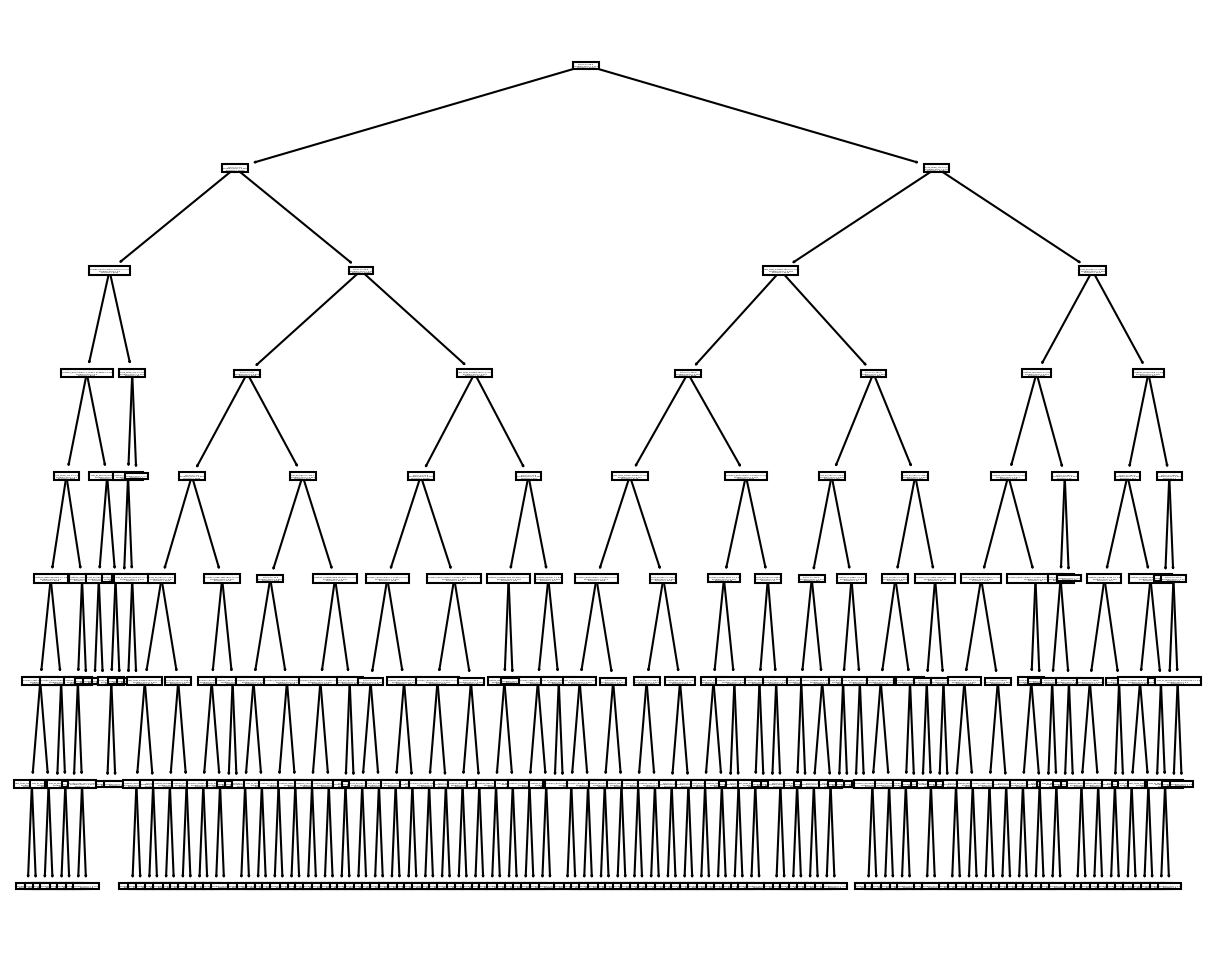

In [201]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DTree, feature_names=features.columns);

In [202]:
y_train_pred = DTree.predict(X_train)
y_predict = DTree.predict(X_test)

dec_mse_score_train = mean_squared_error(y_train,y_train_pred)
dec_mse_score = mean_squared_error(y_test,y_predict)
dec_rmse_score_train = np.sqrt(dec_mse_score_train)
dec_rmse_score = np.sqrt(dec_mse_score)
dec_mape_score = mean_absolute_percentage_error(y_test,y_predict)

print("Train RMSE:", dec_rmse_score_train, "\nTest RMSE:", dec_rmse_score, "\nTest MAPE:", dec_mape_score)

Train RMSE: 0.27798174868139275 
Test RMSE: 0.2787657096023995 
Test MAPE: 0.051338015751514275


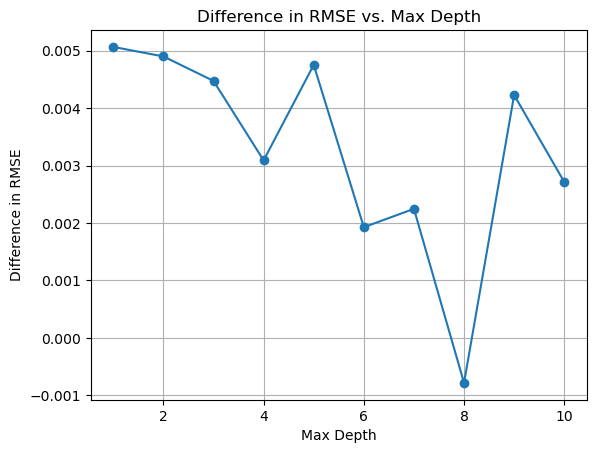

In [203]:
# loop to find best Max_depth value at which train-test rmse is lowest.
max_depth_values = []
rmse_diff_values = []
rmse_test_values = []
rmse_train_values = []

# Loop over different max_depth values
for max_depth in range(1, 11):
    # Create and fit the decision tree regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate RMSE for train and test data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate difference in RMSE
    rmse_diff = rmse_train - rmse_test
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)
    rmse_diff_values.append(rmse_diff)

# Plot the graph
plt.plot(max_depth_values, rmse_diff_values, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Difference in RMSE')
plt.title('Difference in RMSE vs. Max Depth')
plt.grid(True)
plt.show()

<a id='knn'></a>
### 3.4.3 K Nearest Neighbors Regression

In [204]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_mse_score = mean_squared_error(y_test,y_pred)
knn_rmse_score = np.sqrt(knn_mse_score)
knn_mape_score = mean_absolute_percentage_error(y_test,y_pred)

print("RMSE:", knn_rmse_score, "MAPE:", knn_mape_score)

RMSE: 0.24272883630927683 MAPE: 0.043836353341279534


<a id='compare_model'></a>
## 3.5 Comparing models

In [206]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'K Nearest Neighnour'],
    'RMSE' : [lin_rmse_score, dec_rmse_score, knn_rmse_score],
    'MAPE' : [lin_mape_score, dec_mape_score, knn_mape_score]
})


models.sort_values(by = ['RMSE', 'MAPE'], ascending = True)

,Model,RMSE,MAPE
2,K Nearest Neighnour,0.242729,0.043836
1,Decision Tree,0.278766,0.051338
0,Linear Regression,0.308841,0.068132


<a id='conclusion'></a>
# 4. Inferences and Conclusion

When choosing a model, it is important to consider both the RMSE and MAPE values to assess the overall performance and accuracy of the predictions because of the following reasons:

1. **RMSE:** 
    - It measures the ***average difference between the predicted values and the actual values***, giving us an idea of **how close the predicted values are to the true values**. A **lower RMSE** indicates **better accuracy**, as it signifies smaller deviations between predicted and actual values.


2. **MAPE:** 
    - It measures the ***percentage difference between the predicted values and the actual values***. It gives us an understanding of the **relative error in the predictions**. A **lower MAPE** indicates **better accuracy**, as it signifies smaller percentage deviations between predicted and actual values.

By considering both RMSE and MAPE, we gain a more comprehensive understanding of the model's performance. **RMSE focuses on absolute differences, while MAPE focuses on relative differences.** Together, they provide a balanced view of accuracy, considering both the magnitude and percentage of errors.

By comparing the RMSE and MAPE values of different models, we can evaluate which model performs better and has higher accuracy in predicting the target variable. It helps us make an informed decision in selecting the most suitable model for our specific task or problem.

***That's why we have considered both RMSE and MAPE for choosing our model.***

## Inference

From the above output, we can infer the following:

1. **K Nearest Neighbors (KNN) model has the lowest RMSE (Root Mean Squared Error) and the lowest MAPE (Mean Absolute Percentage Error) among the three models. This suggests that the K Nearest Neighbors (KNN) model performs the best in terms of accuracy in predicting the target variable.**


2. The **Decision Tree model** has RMSE and MAPE indicating **slightly higher errors** compared to the K Nearest Neighbors (KNN) model but still performs reasonably well.


3. The **Linear Regression model** has the highest RMSE and highest MAPE, suggesting that it has the **highest prediction error** among the three models.

Based on these results, it can be concluded that the ***K Nearest Neighbors (KNN) model is the most accurate and reliable model for predicting the target variable***, followed by the Decision Tree model. The Linear Regression model shows comparatively higher errors and may not be as effective in this particular scenario.